# Generate Dataset

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
word_tokenize('hello world')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['hello', 'world']

In [ ]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv'
PATH = "/content/drive/MyDrive/PY/NLP/"
df = pd.read_csv(PATH+'Tweets.csv')
df.shape

(14640, 15)

In [ ]:
df = df.loc[:,['tweet_id','text','airline_sentiment']]

In [ ]:
from sklearn.model_selection import train_test_split

    
X_train, X_test, y_train, y_test = train_test_split(df.index,  df.airline_sentiment, test_size = 0.1, random_state=2021, stratify=df.airline_sentiment)

X_train, X_dev, y_train, y_dev = train_test_split(X_train,  y_train, test_size = 0.1, random_state=2021, stratify=y_train)

X_train.shape,y_train.shape,X_test.shape, y_test.shape,X_dev.shape, y_dev.shape


((11858,), (11858,), (1464,), (1464,), (1318,), (1318,))

In [ ]:
df_test = df.iloc[X_test] 
df_test.loc[:,"airline_sentiment"] = ['?' for i in range(len(X_test))]
df_test

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,tweet_id,text,airline_sentiment
12249,570251814970515456,@AmericanAir I need refund.,?
11357,568173388663013377,@USAirways after 3 Cancelled Flightlations and...,?
7712,569320520728113152,@JetBlue thanks so much. Can't wait to fly wit...,?
1962,569503367757754369,@united I have never been more frustrated than...,?
10684,568981079278751744,"@USAirways - the worst! Hold time crazy, agent...",?
...,...,...,...
14009,569678153783877634,@AmericanAir I didn't miss my flight. America...,?
9549,569882442129133568,@USAirways here's to sitting on hold for 4 hrs...,?
6134,568192010789777408,@SouthwestAir just had a great flight #4223 wi...,?
13646,569774692371820544,@AmericanAir Why did AA973 return to JFK? Tha...,?


In [ ]:
df.iloc[X_train].to_csv(PATH+'Tweets_train.csv',index=False)
df.iloc[X_dev].to_csv(PATH+'Tweets_dev.csv',index=False)
df.iloc[X_test,[0,2]].to_csv(PATH+'test_results.csv',index=False)
df_test.to_csv(PATH+'Tweets_test.csv',index=False)

Text(0.5, 1.0, 'Dev set')

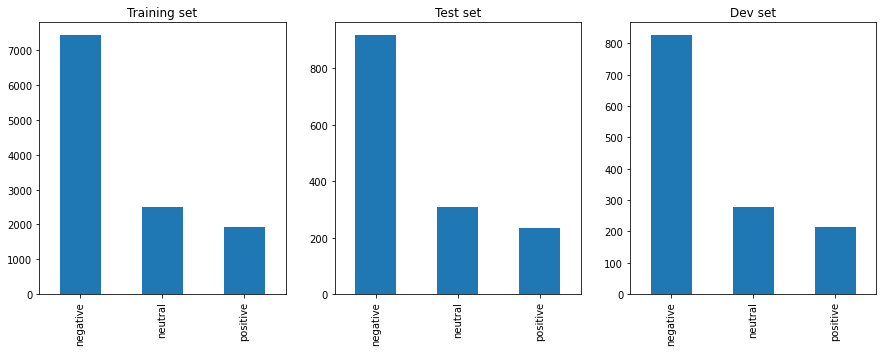

In [ ]:
ax=plt.figure(figsize=(15,5))
ax.set_facecolor('white')
plt.subplot('131')
y_train.value_counts().plot.bar()
plt.title('Training set')
plt.subplot('132')
y_test.value_counts().plot.bar()
plt.title('Test set')
plt.subplot('133')
y_dev.value_counts().plot.bar()
plt.title('Dev set')

In [ ]:
y_dev

6231     positive
6114     positive
11660    negative
2909     positive
7456      neutral
           ...   
12691    negative
12570    negative
3248     negative
11807    negative
4567     positive
Name: airline_sentiment, Length: 1318, dtype: object

# Sentiment Analysis Task

## Import Module and Data

In [ ]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from tqdm import tqdm
from nltk.corpus import stopwords
stopwordEn = stopwords.words('english')
import pickle

def processText(text,lemma=False, gram=1, rmStop=True): # default remove stop words
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|#', '', text, flags=re.MULTILINE) #delete URL, #hashtag# , and @xxx
    tokens = word_tokenize(text)
    whitelist = ["n't", "not", "no"]
    new_tokens = []
    stoplist = stopwordEn if rmStop else []
    for i in tokens:
      i = i.lower()
      if i.isalpha() and (i not in stoplist or i in whitelist):  #i not in ['.',',',';']  and (...)
        if lemma: i = lemmaWord(i)
        new_tokens.append(i)
    del tokens
    # tokens = [lemmaWord(i.lower()) if lemma else i.lower() for i in tokens if (i.lower() not in stoplist or i.lower() in whitelist) and i.isalpha()]
    if gram<=1:
        return new_tokens
    else:
        return [' '.join(i) for i in nltk.ngrams(new_tokens, gram)]

# def preprocess_text(sen):
#     # Removing html tags
#     sentence = remove_tags(sen)
#     # Remove punctuations and numbers
#     sentence = re.sub('[^a-zA-Z]', ' ', sentence)
#     # Single character removal
#     sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
#     # Removing multiple spaces
#     sentence = re.sub(r'\s+', ' ', sentence)
#     return sentence

# TAG_RE = re.compile(r'<[^>]+>')

# def remove_tags(text):
#     return TAG_RE.sub('', text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# def preprocess_text(sen):
#     # Removing html tags
#     sentence = remove_tags(sen)

#     # Remove punctuations and numbers
#     sentence = re.sub('[^a-zA-Z]', ' ', sentence)

#     # Single character removal
#     sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

#     # Removing multiple spaces
#     sentence = re.sub(r'\s+', ' ', sentence)

#     return sentence

# TAG_RE = re.compile(r'<[^>]+>')

# def remove_tags(text):
#     return TAG_RE.sub('', text)

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/PY/NLP/Tweets_train.csv')
df_dev =  pd.read_csv('/content/drive/MyDrive/PY/NLP/Tweets_dev.csv')
df_test =  pd.read_csv('/content/drive/MyDrive/PY/NLP/Tweets_test.csv')

## Explore Data
only use df_train set from this stage

Text(0.5, 1.0, 'Count of Sentiment')

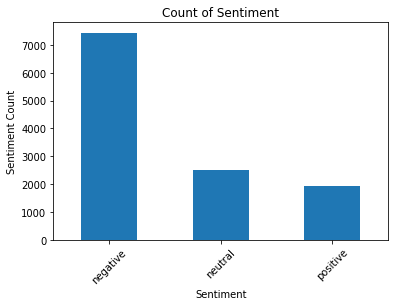

In [ ]:
df_train.airline_sentiment.value_counts().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Sentiment Count')
plt.xlabel('Sentiment')
plt.title('Count of Sentiment')

## Prepare Data

In [ ]:
df_train.loc[:,'tokens'] = [processText(i) for i in tqdm(df_train['text'])]
df_dev.loc[:,'tokens'] = [processText(i) for i in tqdm(df_dev['text'])]
df_test.loc[:,'tokens'] = [processText(i) for i in tqdm(df_test['text'])]

100%|██████████| 11858/11858 [00:03<00:00, 2996.59it/s]
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/missing.py:495: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  val = np.array(val, copy=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
100%|██████████| 1464/1464 [00:00<00:00, 3204.31it/s]


In [ ]:
dict_sent = {'negative':0, 'neutral':1, 'positive':2}
df_train['airline_sentiment'] = [dict_sent[i] for i in df_train['airline_sentiment']]
df_dev['airline_sentiment'] = [dict_sent[i] for i in df_dev['airline_sentiment']]

df_train.head()

,tweet_id,text,airline_sentiment,tokens
0,569179849518161920,@united you're good. Thank you!,2,"[good, thank]"
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",0,"[way, ruin, vacation, brother, called, night, ..."
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,2,"[yes, thankfully, catering, got, loading, frus..."
3,569525116725567491,@USAirways The automated message isn't helpful...,0,"[automated, message, helpful, impossible, spea..."
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,2,"[makingloveoutofnothingatall, brandloveaffair,..."


In [ ]:
X_train, y_train = df_train['text'],df_train['airline_sentiment']
X_dev, y_dev = df_dev['text'],df_dev['airline_sentiment']
X_test = df_test['text']

## Tokenizing (example)
Tokenizing will be used in the pipeline in the next stage

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word', ngram_range=(1, 1))
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(11858, 13395)

In [ ]:
count_vect.vocabulary_.get('hello'),count_vect.vocabulary_.get('world')

(6123, 13130)

In [ ]:
X_train[2]

'@JetBlue yes thankfully! Catering just got here and now they are loading, but very frustrated. I was supposed to be there by 10-10:30'

In [ ]:
pd.Series(X_train_counts.toarray()[2]).value_counts() 

0    13372
1       22
2        1
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
pd.Series(X_train_tfidf.toarray()[2]).value_counts()

0.000000    13372
0.193738        1
0.209163        1
0.095766        1
0.161719        1
0.128880        1
0.421043        1
0.134270        1
0.326470        1
0.332436        1
0.071289        1
0.111013        1
0.144490        1
0.190806        1
0.234679        1
0.140669        1
0.156728        1
0.173116        1
0.242676        1
0.200155        1
0.136409        1
0.283949        1
0.179381        1
0.141172        1
dtype: int64

## Traing a Classifier

### Logistic Regression

In [ ]:
# pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 1))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', LogisticRegression(random_state=42,n_jobs=-1)),
])
text_clf = text_clf.fit(X_train, y_train)

In [ ]:
# evaluation on dev set
predicted = text_clf.predict(X_dev)
print("Accuracy:",np.mean(predicted == y_dev))

Accuracy: 0.7852807283763278


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_dev, predicted, target_names=dict_sent))

              precision    recall  f1-score   support

    negative       0.81      0.93      0.86       826
     neutral       0.66      0.49      0.56       279
    positive       0.81      0.62      0.70       213

    accuracy                           0.79      1318
   macro avg       0.76      0.68      0.71      1318
weighted avg       0.78      0.79      0.77      1318



In [ ]:
# prediction on test set
res_new = text_clf.predict(X_test)
res_new_str = [list(dict_sent.keys())[i] for i in res_new]
df_test.loc[:,'airline_sentiment'] = res_new_str

#save to file for submission
df_test.iloc[:,[0,1,2]].to_csv(PATH+"STUDENT_SUBMISSION.csv", index=False)
df_test

### Grid search


In [ ]:
from sklearn.model_selection import GridSearchCV

text_clf_gs = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(random_state=42,n_jobs=-1)),
])
parameters = {
    # 'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__solver': ('newton-cg', 'lbfgs'),
    'clf__tol': (1e-4, 1e-3, 1e-5),
}

gs_clf = GridSearchCV(text_clf_gs, parameters, cv=5, n_jobs=-1) #n_jobs=-1 auto detect all CPU cores

In [ ]:
gs_clf = gs_clf.fit(X_train, y_train) 

In [ ]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__solver: 'lbfgs'
clf__tol: 0.0001
tfidf__use_idf: True


In [ ]:
predicted = gs_clf.best_estimator_.predict(X_dev)
print("Accuracy:",np.mean(predicted == y_dev))

Accuracy: 0.7852807283763278


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_dev, predicted, target_names=dict_sent))

              precision    recall  f1-score   support

    negative       0.81      0.93      0.86       826
     neutral       0.66      0.49      0.56       279
    positive       0.81      0.62      0.70       213

    accuracy                           0.79      1318
   macro avg       0.76      0.68      0.71      1318
weighted avg       0.78      0.79      0.77      1318



# Code to Assess Student submission

In [ ]:
df_test = pd.read_csv(PATH+'STUDENT_SUBMISSION.csv') # student submission
df_true = pd.read_csv(PATH+'test_results.csv') # true value
df_res = pd.DataFrame.merge(df_test, df_true, 'inner', on=['tweet_id'])

y_pred = df_res.airline_sentiment_x
y_true = df_res.airline_sentiment_y

In [ ]:
print(metrics.classification_report(y_true, y_pred, target_names=dict_sent))


              precision    recall  f1-score   support

    negative       0.84      0.94      0.89       926
     neutral       0.71      0.57      0.63       312
    positive       0.79      0.64      0.71       244

    accuracy                           0.81      1482
   macro avg       0.78      0.71      0.74      1482
weighted avg       0.80      0.81      0.80      1482



# Word2Vec Classification
use 20newsgroups dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [ ]:
import pandas as pd

df = pd.DataFrame({'text':twenty_train.data,'class':twenty_train.target})
df.loc[:,'tokens'] = [processText(i) for i in tqdm(df['text'])]
df.head()

100%|██████████| 1777/1777 [00:05<00:00, 340.45it/s]
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/missing.py:495: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  val = np.array(val, copy=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,class,tokens
0,From: tbrent@ecn.purdue.edu (Timothy J Brent)\...,2,"[from, timothy, j, brent, subject, am, i, goin..."
1,From: CBW790S@vma.smsu.edu.Ext (Corey Webb)\nS...,0,"[from, corey, webb, subject, re, help, grasp, ..."
2,From: ds@aris.nswc.navy.mil (Demetrios Sapouna...,0,"[from, demetrios, sapounas, subject, display, ..."
3,Nntp-Posting-Host: bones.et.byu.edu\nLines: 6\...,0,"[lines, subject, pd, viewer, wanted, summary, ..."
4,Organization: Penn State University\nFrom: <JE...,0,"[organization, penn, state, university, from, ..."


In [ ]:
# using Coursework dataset
# df = df_train
# df.loc[:,'tokens'] = [processText(i) for i in tqdm(df['text'])]
# df_dev.loc[:,'tokens'] = [processText(i) for i in tqdm(df_dev['text'])]
# dict_sent = {'negative':0, 'neutral':1, 'positive':2}
# df['class'] = [dict_sent[i] for i in df['airline_sentiment']]
# df_dev['class'] = [dict_sent[i] for i in df_dev['airline_sentiment']]
# df = df[df['tokens'].map(len) > 0]
# df_dev = df_dev[df_dev['tokens'].map(len) > 0]
# df.head()

## GLOVE
example of loading pre-trained embedding 

In [ ]:
# 
EMB_DIM = 50
glove = {}
with open(PATH+F"./GLOVE/glove.twitter.27B.{EMB_DIM}d.txt", 'rb') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        if len(vector)==EMB_DIM:
            glove[word] = vector
print('Loaded %s word vectors.' % len(glove))

## W2V
or train a Word2Vec model from scratch 

In [ ]:
import gensim
model = gensim.models.Word2Vec(df['tokens'], size=100)
w2v = dict(zip(model.wv.index2word, model.wv.vectors))

In [ ]:
len(w2v) # w2f shape: 7414 * 100

7544

In [ ]:
# count vec + raw text
count_vect = CountVectorizer(analyzer='word', ngram_range=(1, 1))
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(1777, 31638)

In [ ]:
# count vec + prepared tokens
count_vect = CountVectorizer(analyzer=lambda x: x, ngram_range=(1, 1))
X_train_counts = count_vect.fit_transform(df['tokens'])
X_train_counts.shape

(1777, 23972)

In [ ]:
# tfidf vec + prepared tokens
count_vect = TfidfVectorizer(analyzer=lambda x: x)
X_train_counts = count_vect.fit_transform(df['tokens'])
X_train_counts.shape

(1777, 23972)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
class MeanEmbeddingVectorizer(object): # to replace the basic CountVectorizer
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec)

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

class TfidfEmbeddingVectorizer(object): # tf-idf weights * mean(word2vec)
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec)

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])

In [ ]:
etree_w2v.fit(df['tokens'], df['class'])

Pipeline(memory=None,
         steps=[('word2vec vectorizer',
                 <__main__.MeanEmbeddingVectorizer object at 0x7f663ae2cad0>),
                ('extra trees',
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=200, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
etree_w2v_tfidf.fit(df['tokens'], df['class'])

Pipeline(memory=None,
         steps=[('word2vec vectorizer',
                 <__main__.TfidfEmbeddingVectorizer object at 0x7f663ae2cd90>),
                ('extra trees',
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=200, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
# import test set
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
X_test = [processText(i) for i in tqdm(twenty_test.data)]

100%|██████████| 1183/1183 [00:03<00:00, 304.64it/s]


In [ ]:
from sklearn import metrics
predicted = etree_w2v.predict(X_test) # make prediction
print("Accuracy:",np.mean(predicted == twenty_test.target)) 
print("F1:",metrics.classification_report(twenty_test.target, predicted)) 

Accuracy: 0.7734573119188504
F1:               precision    recall  f1-score   support

           0       0.76      0.87      0.81       389
           1       0.72      0.63      0.67       396
           2       0.84      0.82      0.83       398

    accuracy                           0.77      1183
   macro avg       0.77      0.77      0.77      1183
weighted avg       0.77      0.77      0.77      1183



In [ ]:
predicted = etree_w2v_tfidf.predict(X_test) # make prediction
print("Accuracy:",np.mean(predicted == twenty_test.target)) 
print("F1:",metrics.classification_report(twenty_test.target, predicted)) 

Accuracy: 0.8064243448858833
F1:               precision    recall  f1-score   support

           0       0.79      0.87      0.83       389
           1       0.74      0.71      0.73       396
           2       0.89      0.83      0.86       398

    accuracy                           0.81      1183
   macro avg       0.81      0.81      0.81      1183
weighted avg       0.81      0.81      0.81      1183

